To telnet to a Cisco switch automatically with Python and change its hostname, follow these step-by-step instructions:

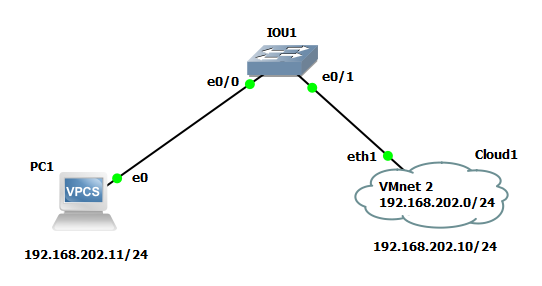

**1. Set Up the Environment**

* *Ensure Python is installed:* Use Python 3.x and install it if necessary.
* *Install required library:* Use the telnetlib library for Telnet communication. It comes pre-installed with Python, so no extra installation is needed.

**2. Configure the Network**

* Assign IP addresses to the switch and PC based on the topology:
    * PC1: 192.168.202.11/24
    * Switch (IOU1): Configure an IP for its interface (192.168.202.1/24).
* Ensure connectivity between the devices using the ping command.

**3. Enable Telnet on the Cisco Switch**

On the Cisco switch (IOU1), configure the following via the console:

In [ ]:
IOU1#configure terminal
IOU1(config)#interface vlan 1
IOU1(config-if)#ip address 192.168.202.1 255.255.255.0
IOU1(config-if)#no shut
IOU1(config-if)#exit
IOU1(config)#line vty 0 4
IOU1(config-line)#password cisco
IOU1(config-line)#exit
IOU1(config)#enable password cisco
IOU1(config)#exit
IOU1#write memory

**4. Connectivity Test**

Ensure connectivity between the devices using the ping command.

In [ ]:
PC1> show ip

NAME        : PC1[1]
IP/MASK     : 192.168.202.11/24
GATEWAY     : 192.168.202.1
DNS         :
MAC         : 00:50:79:66:68:00
LPORT       : 20008
RHOST:PORT  : 127.0.0.1:20009
MTU         : 1500

PC1> ping 192.168.202.1

84 bytes from 192.168.202.1 icmp_seq=1 ttl=255 time=0.352 ms
84 bytes from 192.168.202.1 icmp_seq=2 ttl=255 time=1.026 ms
84 bytes from 192.168.202.1 icmp_seq=3 ttl=255 time=0.971 ms
84 bytes from 192.168.202.1 icmp_seq=4 ttl=255 time=1.074 ms
84 bytes from 192.168.202.1 icmp_seq=5 ttl=255 time=0.477 ms
^C
PC1> ping 192.168.202.10

84 bytes from 192.168.202.10 icmp_seq=1 ttl=128 time=0.743 ms
84 bytes from 192.168.202.10 icmp_seq=2 ttl=128 time=1.694 ms
84 bytes from 192.168.202.10 icmp_seq=3 ttl=128 time=0.753 ms
84 bytes from 192.168.202.10 icmp_seq=4 ttl=128 time=2.092 ms
PC1>

**5. Python Script for Telnet**

The following Python script connects to the Cisco switch, logs in, and changes the hostname:

In [1]:
import telnetlib
import time

# Telnet connection details
HOST = "192.168.202.1"  # Switch IP
USER = "cisco"          # Telnet username
PASSWORD = "cisco"      # Telnet password

try:
    # Establish Telnet connection
    tn = telnetlib.Telnet(HOST)

    # Wait for login prompt and send username
    tn.read_until(b"Password: ")
    tn.write(PASSWORD.encode('ascii') + b"\n")

    # Enter enable mode
    tn.write(b"enable\n")
    tn.write(b"cisco\n")  # Enable password

    # Go to configuration mode
    tn.write(b"configure terminal\n")

    # Change the hostname
    tn.write(b"hostname NewSwitchName\n")

    # Exit configuration mode and save changes
    tn.write(b"end\n")
    tn.write(b"write memory\n")

    # Close Telnet session
    tn.write(b"exit\n")

    print(tn.read_all().decode('ascii'))

except Exception as e:
    print(f"An error occurred: {e}")

C:\Users\yas\AppData\Local\Temp\ipykernel_5388\358185870.py:1: DeprecationWarning: 'telnetlib' is deprecated and slated for removal in Python 3.13
  import telnetlib



IOU1>enable
Password: 
IOU1#configure terminal
Enter configuration commands, one per line.  End with CNTL/Z.
IOU1(config)#hostname NewSwitchName
NewSwitchName(config)#end
NewSwitchName#write memory
Building configuration...
Compressed configuration from 1413 bytes to 858 bytes[OK]
NewSwitchName#exit

